<a href="https://colab.research.google.com/github/KatBotkowska/Pandas-Numpy-exercices/blob/master/Warsztaty_WiT_4_modelowanie_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WARSZTAT NR 4**

### **Podstawy modelowania w Pythonie**

Do modelowania w Pythonie służą między innymi biblioteki <span style="background-color:yellow">**scikit-learn**</span> zawierająca algorytmy klasyfikacji, regresji i klastrowania oraz <span style="background-color:yellow">**statsmodels**</span> pozwalająca szacować modele statystyczne i przeprowadzać testy statystyczne.

Dziś zajmiemy się modelem regresji liniowej, który pozwala dopasować liniową krzywą regresji do danych pomiarowych. Zakładamy, że pomiędzy X (zmienną/zmiennymi niezależnymi) a y (zmienną zależną, którą chcemy przewidywać) istnieje liniowa zależność.

Dokumentacja:

scikit-learn https://scikit-learn.org/stable/

statsmodels https://www.statsmodels.org/stable/index.html

Typy regresji:
    
- liniowa https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Ridge https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- Elastic Net https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Kolejne kroki:

- Konstruujemy y - zmienną zależną,
- Konstruujemy macierz X zmiennych niezależnych,
- Dodajemy stałą (intercept), tj. oczekiwaną wartość średnią y dla X = 0, potrzebne dla stats model
- Modelowanie regresji,
- Analiza/wizualizacja wyników,
- Ewentualnie: tuning modelu/optymalizację ... optymalizacja złożoności modelu, który model zapewni nam robustness (odporność) - lepsze wartości wskaźników

In [2]:
# Na początek importujemy potrzebne biblioteki.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # importujemy jako 'plt', dla uproszczenia
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn.metrics as metrics  #zbiór metod do wyznaczania wskaźników modelu czy jest dobrze dopasowany

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
#podłączenie google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
data_2=pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Changping_20130301-20170228.csv', sep=',')
data_3 = pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Tiantan_20130301-20170228.csv', sep=',')

In [4]:
# Importujemy i przygotowujemy potrzebne zbiory danych.
#data = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
data.rename({'PM2.5': 'PM2_5'}, axis=1, inplace=True)
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['PM2_5'].fillna(data['PM2_5'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['NO2'].fillna(data['NO2'].mean(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)

In [7]:
data2015 = data.loc[data['year'] == 2015]
data2015

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16104,16105,2015,1,1,0,13.0,50.0,19.0,29.0,500.0,28.0,-1.0,1027.0,-22.4,0.0,NNW,4.4,Aotizhongxin
16105,16106,2015,1,1,1,11.0,30.0,15.0,31.0,600.0,27.0,-1.0,1027.0,-23.7,0.0,N,5.6,Aotizhongxin
16106,16107,2015,1,1,2,13.0,33.0,16.0,32.0,600.0,26.0,-1.0,1028.0,-23.7,0.0,N,4.2,Aotizhongxin
16107,16108,2015,1,1,3,10.0,29.0,10.0,25.0,500.0,31.0,-1.0,1029.0,-24.4,0.0,N,4.4,Aotizhongxin
16108,16109,2015,1,1,4,12.0,25.0,14.0,33.0,700.0,24.0,-2.0,1027.0,-23.2,0.0,ENE,1.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24859,24860,2015,12,31,19,98.0,148.0,28.0,119.0,2600.0,7.0,-1.4,1026.3,-8.6,0.0,E,1.0,Aotizhongxin
24860,24861,2015,12,31,20,98.0,165.0,24.0,113.0,3300.0,8.0,-2.5,1026.2,-8.4,0.0,E,1.3,Aotizhongxin
24861,24862,2015,12,31,21,107.0,187.0,27.0,117.0,4000.0,10.0,-2.7,1025.8,-8.0,0.0,ENE,0.9,Aotizhongxin
24862,24863,2015,12,31,22,150.0,228.0,38.0,129.0,4900.0,12.0,-3.5,1025.5,-7.6,0.0,ENE,0.4,Aotizhongxin


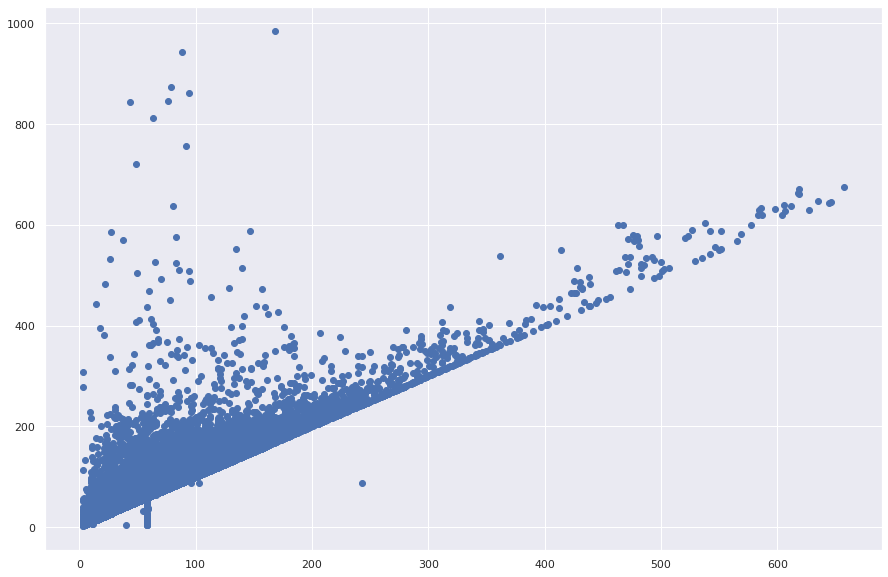

In [6]:
# Przypomnijmy sobie związek pomiędzy PM2.5 a PM10 w 2015 roku...
sns.set_theme(style='darkgrid') #import stylu wykresu
plt.figure(figsize=(15,10))
plt.scatter(data2015.PM2_5,data2015.PM10);

Przykład prostej regresji liniowej ze scikit-learn:

y = c + a*x

In [10]:
# Teraz dopasujemy krzywą regresji opisującą tę zależność. przewidujemy wartości pm10 na podstawie wartości pm2.5
x = data2015['PM2_5'].values[:,np.newaxis]  #przekształcenie wymiarów - reshape z kolumny do wiersza - transpozycja
y = data2015['PM10'].values

# Model regresji liniowej:
model = LinearRegression()
model.fit(x, y) # dopasowanie
y_pred = model.predict(x)

# Podsumowanie modelu: 
r2 = metrics.r2_score(y, y_pred)
print('r2: ', r2)
mae = metrics.mean_absolute_error(y, y_pred) 
print('MAE: ', mae)
mse = metrics.mean_squared_error(y, y_pred) 
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

r2:  0.7387970844923274
MAE:  29.509823992771054
MSE:  2587.325370159483
RMSE:  50.865758326790754


r2-mało rzetelny w dopoasowaniu modelu, od o do 1, im bliżej 1 tym lepiej - nie jest odporny na dużą ilość zmiennych niezależnych mających dużą korelację z y, sama wartość wysoka r2 nie wystarczy do dobrego przewidywania 
mae - mean absolute error
mse - mean square error
rmse - route square error

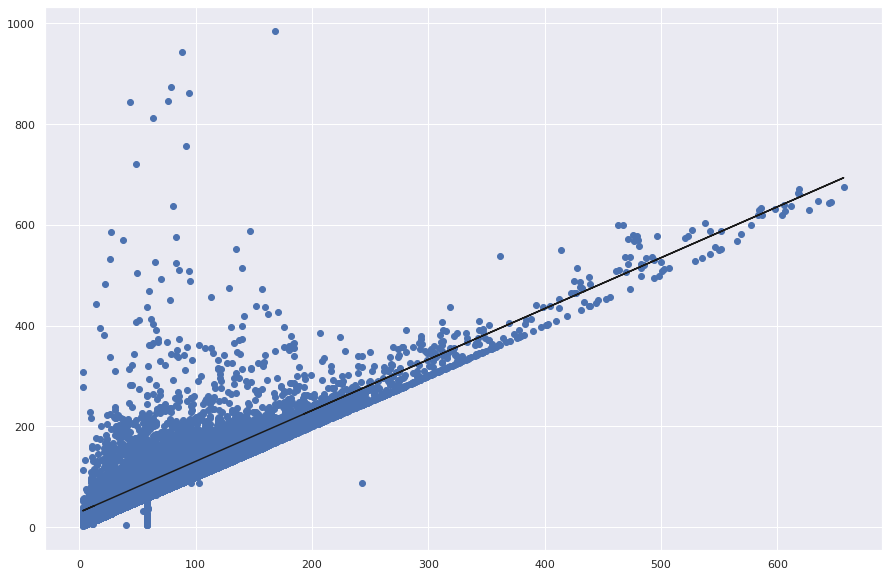

In [9]:
# Sprawdźmy na wykresie efekty dopasowania.
plt.figure(figsize=(15,10))
plt.scatter(x, y) # wykres punktowy zależności PM2.5 oraz PM10
plt.plot(x, y_pred, 'k') # dopasowana krzywa regresji
plt.show()

Przykład ze statsmodels: 
podsumowania modelu w stats model

In [11]:
# Inne podejście: Ordinary Least Squares
x = data2015['PM2_5'].values
x2 = sm.add_constant(x) # Ważne, aby nie używać tego samego x - przyda się nam do wizualizacji!
y = data2015['PM10'].values
model = sm.OLS(y, x2, missing='drop') #pierwszewgo podajemy y, potem x; drop to odrzucenie nan
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 2.477e+04
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:27:35   Log-Likelihood:                -46850.
No. Observations:                8760   AIC:                         9.370e+04
Df Residuals:                    8758   BIC:                         9.372e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.3677      0.755     38.914      0.0

aic - im mniejsze tym lepiej, karze za nadmiarowe parametry
bic - 

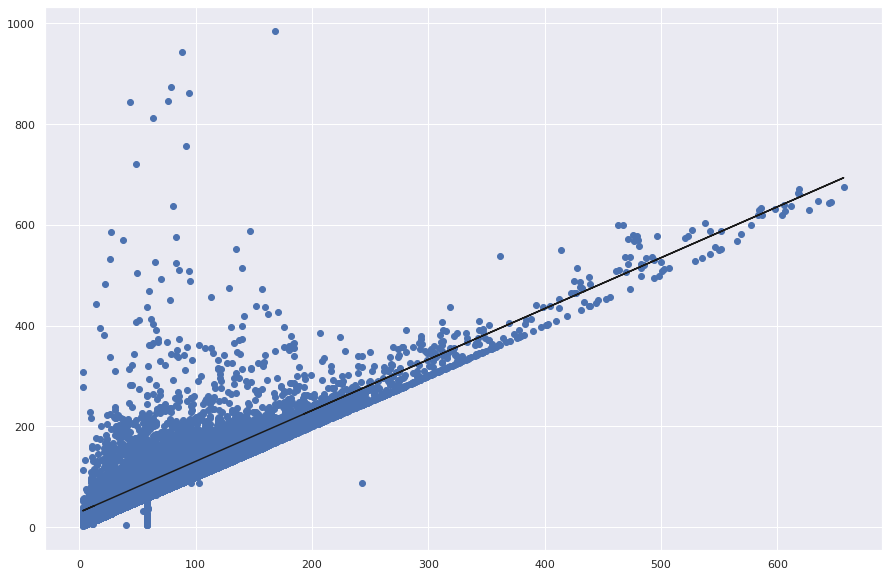

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(x, y) # wykres punktowy zależności PM2.5 oraz PM10
plt.plot(x, result.fittedvalues, 'k') # dopasowana krzywa regresji

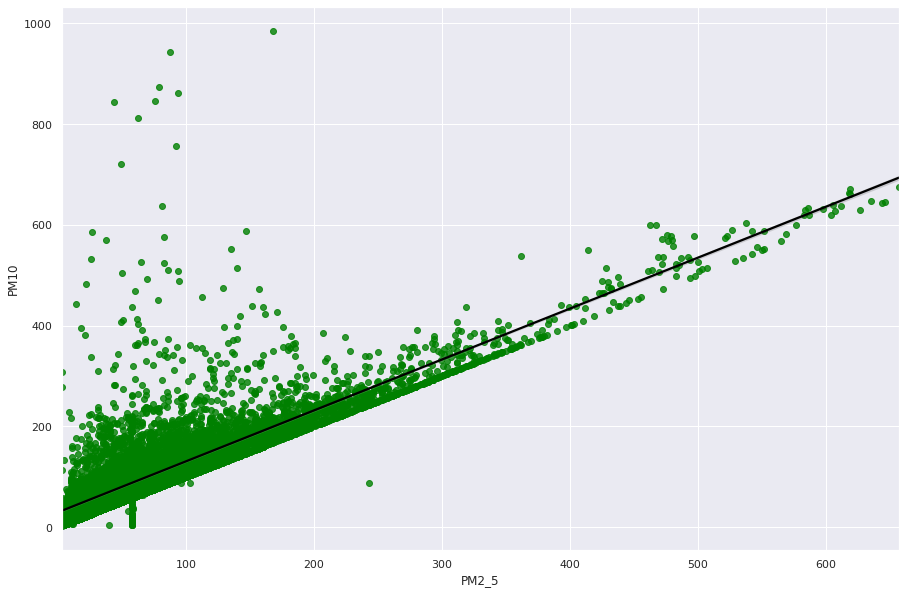

In [13]:
# Kiedy nie chcemy tworzyć modelu, tylko podejrzeć trend...
plt.figure(figsize=(15,10))
sns.regplot(x='PM2_5', y='PM10', data=data2015, scatter_kws={"color": "green"}, line_kws={"color": "black"});

Przykład regresji liniowej dla macierzy zmiennych niezależnych X:

y = c + a1 * x1 + a2 * x2 + a3 * x3 ...


In [14]:
# Próbujemy przewidywać wartości PM10, znając wartości PM2.5, SO2 i NO2.
x = data2015[['PM2_5', 'SO2', 'NO2']]
x = sm.add_constant(x)
y = data2015['PM10']
model = sm.OLS(y, x, missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     8338.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:38:10   Log-Likelihood:                -46817.
No. Observations:                8760   AIC:                         9.364e+04
Df Residuals:                    8756   BIC:                         9.367e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3801      1.015     24.011      0.0

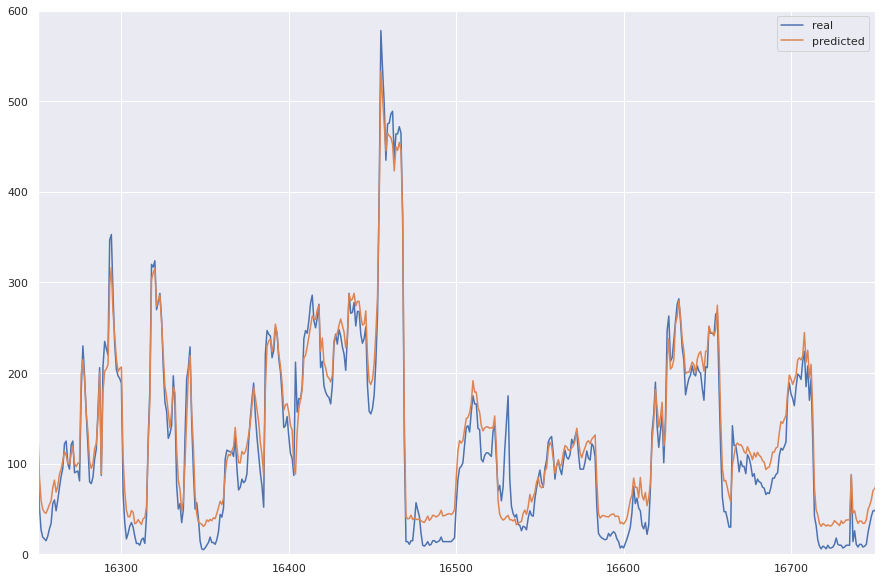

In [15]:
plt.figure(figsize=(15,10))
plt.plot(y, label="real")
plt.plot(result.fittedvalues, label="predicted")
plt.legend()
plt.axis([16250,16750,0,600]);

# **Podstawy Machine Learning z scikit**

https://scikit-learn.org/stable/

https://medium.com/codex/customer-segmentation-with-k-means-in-python-18336fb915be

In [21]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plt.rcParams['figure.figsize'] = (20, 10) #https://matplotlib.org/stable/tutorials/introductory/customizing.html #ustawia się na dłużej wymiary wykresów
plt.style.use('ggplot')
sb.set_style('whitegrid')
#model ktory posegmentuje nam dni w trzy grupy, różniące się zanieczyszczeniem powietrza, trzy grupy homogeniczne o podobnych warunkach metorologicznych - podobne charakterystyki powietrza
#uczenie nienadzorowane - model sam tworzy grupy na podstawie danych

In [17]:
data

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [18]:
data = data.iloc[:,6:11] #wybieramy x - dla uproszczenia tylko te kolumny
data

,PM10,SO2,NO2,CO,O3
0,4.0,4.0,7.0,300.0,77.0
1,8.0,4.0,7.0,300.0,77.0
2,7.0,5.0,10.0,300.0,73.0
3,6.0,11.0,11.0,300.0,72.0
4,3.0,12.0,12.0,300.0,72.0
...,...,...,...,...,...
35059,29.0,5.0,35.0,400.0,95.0
35060,37.0,7.0,45.0,500.0,81.0
35061,37.0,10.0,66.0,700.0,58.0
35062,44.0,12.0,87.0,700.0,35.0


In [19]:
data.describe()

,PM10,SO2,NO2,CO,O3
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,109.588187,17.152554,59.305833,1244.561887,55.649690
std,94.299574,22.557057,36.570739,1192.758674,56.563751
min,2.000000,0.285600,2.000000,100.000000,0.214200
25%,39.000000,3.000000,31.000000,500.000000,9.000000
50%,87.000000,9.000000,55.000000,900.000000,42.000000
75%,153.000000,21.000000,81.000000,1500.000000,80.000000
max,984.000000,341.000000,290.000000,10000.000000,423.000000


In [26]:
# Standaryzujemy dane -> transformacja, by każda kolumna miała wartość oczekiwaną równą 0 i odchylenie standardowe =1
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
data_s = StandardScaler().fit_transform(data)
pd.DataFrame(data_s) #macierz

,0,1,2,3,4
0,-1.119726,-0.583088,-1.430285,-0.791925,0.377461
1,-1.077307,-0.583088,-1.430285,-0.791925,0.377461
2,-1.087912,-0.538755,-1.348251,-0.791925,0.306743
3,-1.098517,-0.272759,-1.320906,-0.791925,0.289064
4,-1.130331,-0.228426,-1.293562,-0.791925,0.289064
...,...,...,...,...,...
35059,-0.854610,-0.538755,-0.664635,-0.708085,0.695691
35060,-0.769773,-0.450090,-0.391188,-0.624244,0.448179
35061,-0.769773,-0.317092,0.183050,-0.456563,0.041552
35062,-0.695540,-0.228426,0.757287,-0.456563,-0.365075


### **PCA**

https://scikit-learn.org/stable/modules/decomposition.html#decompositions

In [23]:
pca = PCA(n_components=3) #PCA z trzema zmiennymi ->zmniejsza wymiarowość zbioru do 3 kolumn
data_r = pca.fit(data_s).transform(data_s)

In [25]:
pd.DataFrame(data_r)

,0,1,2
0,-2.016358,-0.077592,0.392222
1,-1.996266,-0.062491,0.375204
2,-1.920283,-0.129096,0.405060
3,-1.798017,-0.075164,0.629262
4,-1.781055,-0.078499,0.671570
...,...,...,...
35059,-1.531443,0.173658,0.038393
35060,-1.199006,-0.023065,0.032765
35061,-0.644633,-0.418853,0.029237
35062,-0.158612,-0.821122,-0.023675


In [27]:
data_princ = pd.DataFrame(data = data_r, columns = ['principal_com_1', 'principal_com_2','principal_com_3']) #nazwanie kolumn
# 1 kolumna wyjaśnia najwiecej wariancji, pokazuje głowny kierunek - 58 % wariancji z 5 pierwotnych kolumn, 2 kolumna - 19 % wariancji (to co nie zostało wyjaśnione przez 1wszą kolumnę) 3 wektor - ostatnia część wariancji - to widać w explained variance ratio - te procenty
data_princ

,principal_com_1,principal_com_2,principal_com_3
0,-2.016358,-0.077592,0.392222
1,-1.996266,-0.062491,0.375204
2,-1.920283,-0.129096,0.405060
3,-1.798017,-0.075164,0.629262
4,-1.781055,-0.078499,0.671570
...,...,...,...
35059,-1.531443,0.173658,0.038393
35060,-1.199006,-0.023065,0.032765
35061,-0.644633,-0.418853,0.029237
35062,-0.158612,-0.821122,-0.023675


In [28]:
pca.explained_variance_ratio_ #wyjaśniamy 59+19+12 = 90% wariancji przy pomocy 3 kolumn zamiast 5

array([0.57812606, 0.18749278, 0.12087454])

In [29]:
pca.n_components_  #atrybuty obiektu PCA #TAB pca plus tab

3

In [30]:
pca.components_

array([[ 0.47367432,  0.40614552,  0.5129314 ,  0.50995024, -0.2958557 ],
       [ 0.35600764,  0.29290094, -0.18263049,  0.11881359,  0.8602308 ],
       [-0.40118152,  0.84551569, -0.29034606, -0.10663457, -0.16877454]])

In [31]:
pca.n_features_ #ile kolumn wrzuciliśmy do modelu

5

jak wybrać kolumny to pca - skąd wiedzieć ile kolumn ma być na wyjściu - ile procent wariancji wyjaśniamy przy pomocy redukcji kolumn

# **K-means**

https://scikit-learn.org/stable/modules/clustering.html #k-means
Segmentacja - 
kmeans z chmury punktów wybiera losowo 3 punkty (tyle ile klastrów) i dla pozostałych punktów dopasowuje odległości od tych punktów i dzieli na grupy
bardzo wiele razy dobiera te środki (ale iteracyjnie _ bierze pod uwagę wcześniejsze wybory). optymalizacja odległości punktów od środków, by były jak najmniejsze. ale środkiem musi być jeden z punktów.

In [43]:
clusters = 3 # na ile grup dzielimy zbiór? robi się 2,3,4,5 grup - i dla każdej patrzy się jaka jest interpetacja grup, jak się zachowuje - i wybiera to dalszych prac ten podział, który najlepiej wygląda
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)  #liczba inicjująca - jak wybieramy pierwsze trzy punkty, liczba razy ile ma być wywołany algorytm kmeans z różnymi środkami
model.fit(data_princ)

labels = model.labels_

In [44]:
labels #etykiety grup - numerowane od 0

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [45]:
data['cluster_num'] = labels
data.head()

,PM10,SO2,NO2,CO,O3,cluster_num
0,4.0,4.0,7.0,300.0,77.0,2
1,8.0,4.0,7.0,300.0,77.0,2
2,7.0,5.0,10.0,300.0,73.0,2
3,6.0,11.0,11.0,300.0,72.0,2
4,3.0,12.0,12.0,300.0,72.0,2


In [46]:
#podsumujmy dane i sprawdźmy jakie stworzyły się grupy - grupy mają się różnić od siebie, więc można sprawdzić średnie wartości w poszczególnych grupach -powinny być różne
data.groupby('cluster_num').mean()

,PM10,SO2,NO2,CO,O3
cluster_num,,,,,
0,98.123276,13.794191,68.765890,1130.066051,24.498443
1,255.021644,50.774277,112.551184,3278.479120,19.260606
2,67.191866,8.122677,28.900161,601.681185,103.332040


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


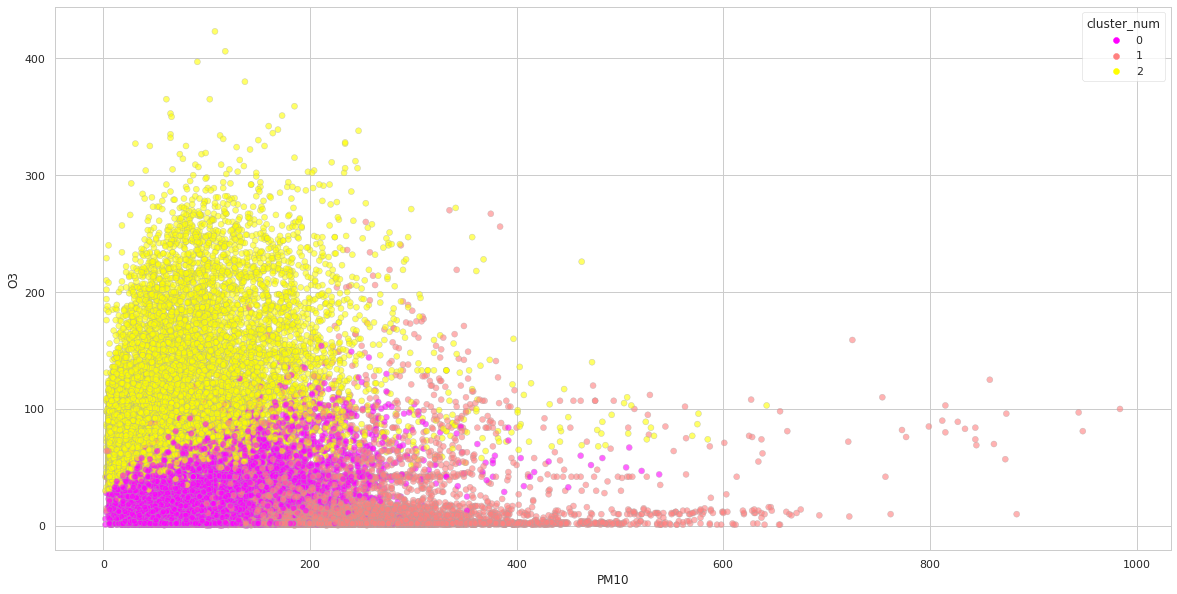

In [47]:
sb.scatterplot('PM10', 'O3', 
               data = data, 
              # s = area, 
               hue = 'cluster_num', #hue - zabarwienie
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey',
               legend='full')  #dodatkowy parametr - hue dąży do legendy skróconej, jak ejest legend full to wtedy na wykresie będa wszystkie grupy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


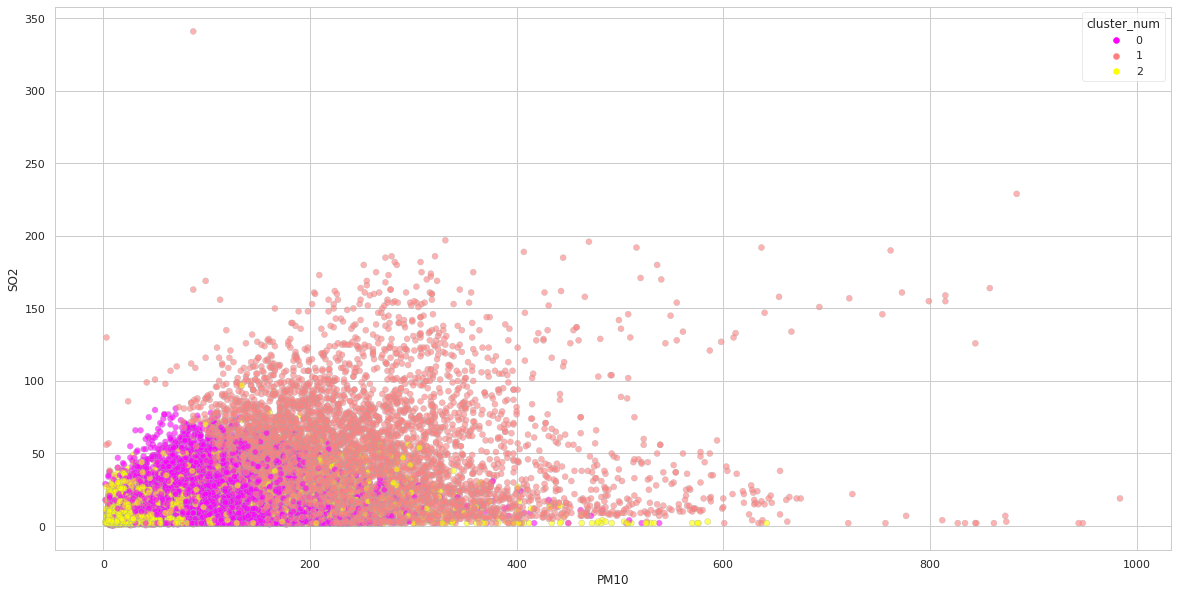

In [48]:
sb.scatterplot('PM10', 'SO2', 
               data = data, 
              # s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')

M. Mohri, A. Rostamizadeh, A. Talwalkar, Foundations of machine learning, MIT press, 2018.
ulab masters - 
https://www.udemy.com/course/machinelearning/
https://d1rkab7tlqy5f1.cloudfront.net/EWI/Over%20de%20faculteit/Afdelingen/Intelligent%20Systems/Pattern%20Recognition%20Laboratory/PR/Reading%20Group/Foundations_of_Machine_Learning.pdf
do 11 kwietnia - wysłać 


